In [1]:
include("chess.jl")

get_reachable_boards_with_one_more_move (generic function with 2 methods)

  likely near In[2]:1
  likely near In[2]:1


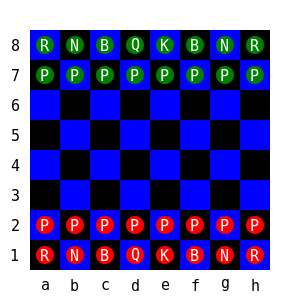

In [2]:
render_board(MailboxBoard())

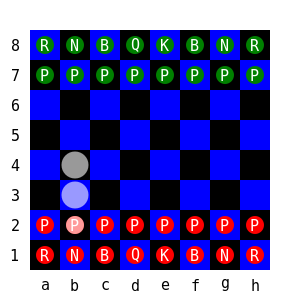

In [3]:
board = MailboxBoard()
loc = Coordinate(2,2)
render_board(board, get_pseudo_legal_moves(board,loc), loc)

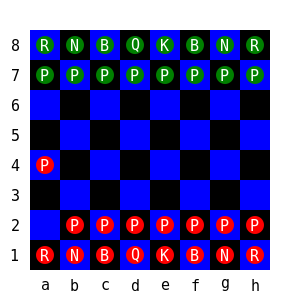

In [4]:
board = MailboxBoard()
move = Move(Coordinate(1,2), Coordinate(1,4))
make_move!(board, move)
render_board(board)

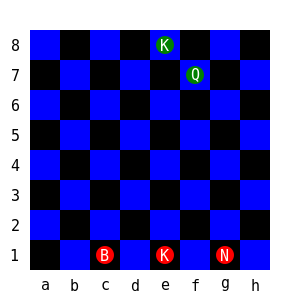

In [5]:
pieces = Array{Piece}(8, 8)
for i in 1 : 64
    pieces[i] = Piece('_', true)
end
# for i in 1 : 8
#     pieces[i,2] = Piece('P', true)
#     pieces[i,7] = Piece('P', false)
# end
pieces[3,1] = Piece('B', true)
pieces[5,1] = Piece('K', true)
pieces[7,1] = Piece('N', true)
# pieces[1,8] = Piece('R', false)
pieces[5,8] = Piece('K', false)
pieces[6,7] = Piece('Q', false)

board = MailboxBoard(pieces,
                    true,
                    true,
                    true,
                    true,
                    true,
                    Coordinate(0,0),
                    0,
                    )
render_board(board)

In [6]:
# board.white_to_move = false
get_legal_moves(board)

13-element Array{Move,1}:
 Move(Coordinate(3, 1), Coordinate(2, 2), '_')
 Move(Coordinate(3, 1), Coordinate(1, 3), '_')
 Move(Coordinate(3, 1), Coordinate(4, 2), '_')
 Move(Coordinate(3, 1), Coordinate(5, 3), '_')
 Move(Coordinate(3, 1), Coordinate(6, 4), '_')
 Move(Coordinate(3, 1), Coordinate(7, 5), '_')
 Move(Coordinate(3, 1), Coordinate(8, 6), '_')
 Move(Coordinate(5, 1), Coordinate(5, 2), '_')
 Move(Coordinate(5, 1), Coordinate(4, 2), '_')
 Move(Coordinate(5, 1), Coordinate(4, 1), '_')
 Move(Coordinate(7, 1), Coordinate(5, 2), '_')
 Move(Coordinate(7, 1), Coordinate(8, 3), '_')
 Move(Coordinate(7, 1), Coordinate(6, 3), '_')

In [7]:
src = Coordinate(5,1)
pl_moves = [Move(src,dst) for dst in get_pseudo_legal_moves(board, src)]
filter!(move -> begin
                board2 = make_move(board, Move(move))
                my_king_loc = get_king_location(board2, board.white_to_move)
                !is_location_in_check(board2, my_king_loc, board.white_to_move)
            end, pl_moves)

3-element Array{Move,1}:
 Move(Coordinate(5, 1), Coordinate(5, 2), '_')
 Move(Coordinate(5, 1), Coordinate(4, 2), '_')
 Move(Coordinate(5, 1), Coordinate(4, 1), '_')

# Perf Tests

In [8]:
boards = get_reachable_boards_with_one_more_move(MailboxBoard())
@test length(boards) == 20 # depth 1
for (depth, node_count) in ((2,400), (3,9802))
    boards = get_reachable_boards_with_one_more_move(boards)
    @test length(boards) == node_count
end

Test Failed
  Expression: length(boards) == node_count
   Evaluated: 8902 == 9802


LoadError: [91mThere was an error during testing[39m

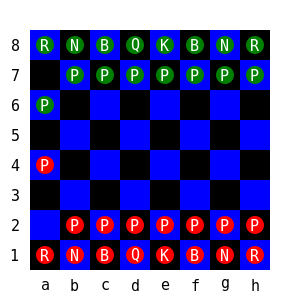

In [13]:
board = MailboxBoard()
make_move!(board, Move(Coordinate(2,1), Coordinate(3,4)))
make_move!(board, Move(Coordinate(1,7), Coordinate(1,6)))
render_board(board)

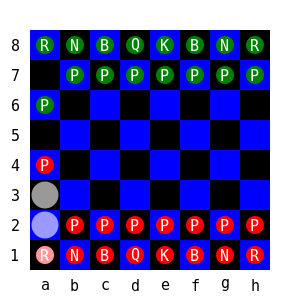

In [14]:
src = Coordinate(1,1)
moves = get_legal_moves(board, src)
locs = [move.dst for move in moves]
render_board(board, locs, src)

In [49]:
using Interact
boards = get_reachable_boards_with_one_more_move(board)
boards_col = collect(boards);

length(boards_col) = 29


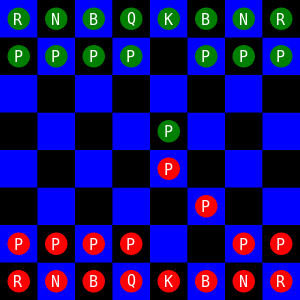

In [54]:
@show length(boards_col)
render_board(boards_col[5])